In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Loads data and import libraries

In [2]:

# Load the data from MNIST-5-6-Subset.txt
# Change the path as needed
data_file_path = "MNIST-5-6-Subset/MNIST-5-6-Subset.txt"
data_matrix = np.loadtxt(data_file_path).reshape(1877, 784)

# Load the labels from MNIST-5-6-Labels.txt
# Change the path as needed
labels_file_path = "MNIST-5-6-Subset/MNIST-5-6-Subset-Labels.txt"
labels = np.loadtxt(labels_file_path)

# Split the data into training and testing sets
x_train, y_train = data_matrix[:50], labels[:50]
x_test, y_test = data_matrix[100], labels[100]


# Task 1
### Implementing the python function

In [3]:
def knn(training_points, training_labels,test_point, test_label):
    training_labels = np.where(training_labels == 5, -1, 1) # change the training label from 5 to -1 and 6 to 1
    test_label = np.where(test_label == 5, -1, 1) # change the test label from 5 to -1 and 6 to 1
    
    distance = np.linalg.norm(training_points - test_point, axis=1) #calculate the distance between test annd training points
    
    index_sort = np.argsort(distance) # sort the distance and get the index
    labels_sort = training_labels[index_sort] # sort the labels according to the index

    sum = np.cumsum(labels_sort) # get the cumulative sum of the labels
    sum[sum > 0]=1 # if the sum is greater than 0, then the label is 6
    sum[sum <= 0]=-1 # if the sum is less than or equal to 0, then the label is 5


    error = np.where(sum != test_label, 1, 0) # if the label is not equal to the test label, then the error is 1, otherwise 0
    return error 

knn(x_train, y_train, x_test, y_test)



    

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

### Splits the validation sets

In [4]:
'''
data_matrix: the data matrix
i: the validation set
m: is the training points that we want to skip
n: is the number of training points that we want to use

returns: the validation set
'''
def validation_set_split(data_matrix, i, m, n):
    #print(m+(i*n)+1,'-' , m+((i+1)*n))
    return data_matrix[m+(i*n)+1:m+((i+1)*n)]




### Plotting the validation sets

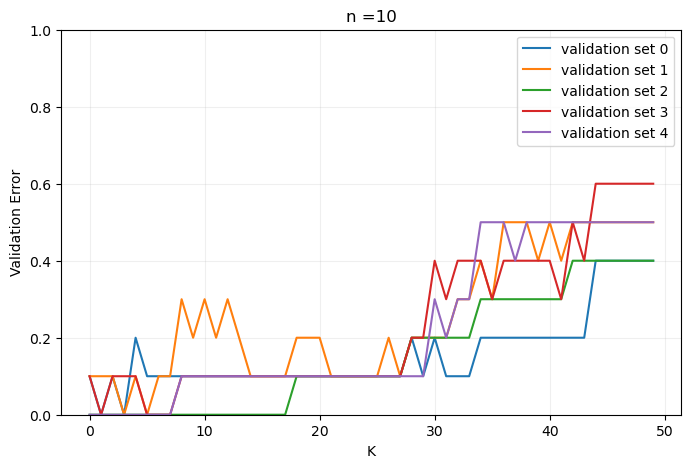

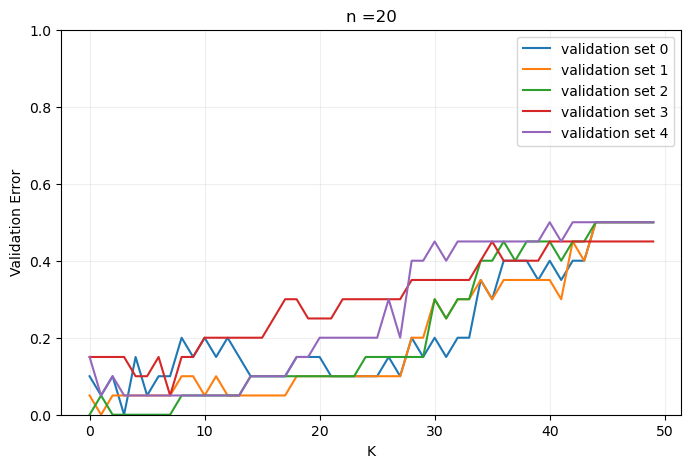

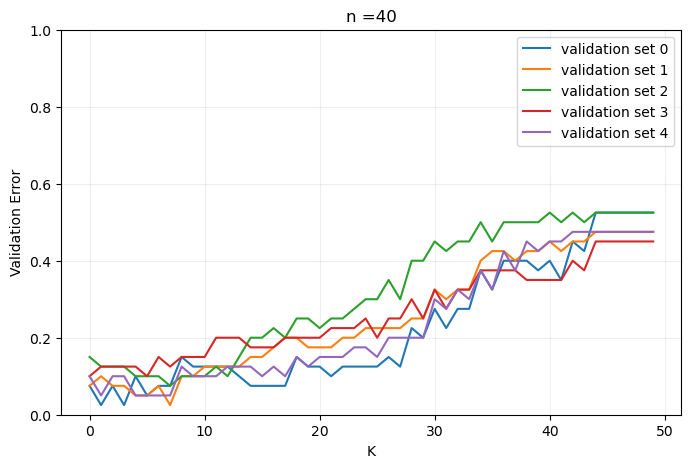

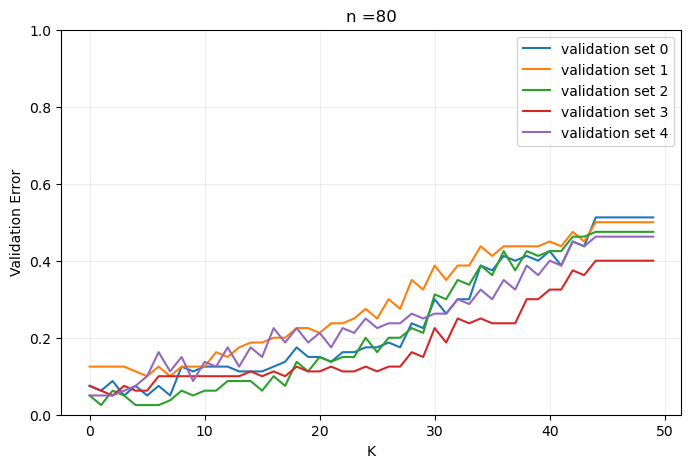

In [5]:

m = 50
lst_n = [10, 20, 40, 80]

total = []
for n in lst_n:
    SumList_list = []
    for i in range(5):
        val_x = validation_set_split(data_matrix, i, m, n)
        val_y = validation_set_split(labels, i, m, n)
        SumList = np.zeros(m)
        for a in range(len(val_x)):
            test = knn(x_train, y_train, val_x[a], val_y[a])
            #print(test)
            SumList = (SumList + test)
        SumList = list(map(lambda x: x / n, SumList))
        SumList_list.append(SumList)
    total.append(SumList_list)
    

    # Dummy data, x and y
    x = np.arange(50)
    y = SumList
    #np.sin(x) + np.random.normal(0, 0.2, len(x))
    # Initialise figure (fig) and axis (ax)
    fig, ax = plt.subplots(figsize=(8,5))
    # Plot in axis, add label to data
    for i in range(len(SumList_list)):
        ax.plot(x, SumList_list[i], label=f'validation set {i}')
        
    # Set labels and title
    ax.set_xlabel('K')
    ax.set_ylabel('Validation Error')
    ax.set_title(f'n ={n}')
    # Add grid
    ax.grid(alpha=0.2)
    # Set axes limit
    #s
    ax.set_ylim(0,1)
    # Add legend (remember to label the data as shown above (*))
    ax.legend()
    # Show plot
    plt.show()
    # Save plot to some local path
    fig.savefig('validation_err.png')







In [6]:
print (SumList_list)


[[0.075, 0.0625, 0.0875, 0.05, 0.075, 0.05, 0.075, 0.05, 0.125, 0.1125, 0.125, 0.125, 0.125, 0.1125, 0.1125, 0.1125, 0.125, 0.1375, 0.175, 0.15, 0.15, 0.1375, 0.1625, 0.1625, 0.175, 0.175, 0.1875, 0.175, 0.2375, 0.225, 0.3, 0.2625, 0.3, 0.3, 0.3875, 0.375, 0.4125, 0.4, 0.4125, 0.4, 0.425, 0.3875, 0.45, 0.4375, 0.5125, 0.5125, 0.5125, 0.5125, 0.5125, 0.5125], [0.125, 0.125, 0.125, 0.125, 0.1125, 0.1, 0.125, 0.1, 0.125, 0.125, 0.125, 0.1625, 0.15, 0.175, 0.1875, 0.1875, 0.2, 0.2, 0.225, 0.225, 0.2125, 0.2375, 0.2375, 0.25, 0.275, 0.25, 0.3, 0.275, 0.35, 0.325, 0.3875, 0.35, 0.3875, 0.3875, 0.4375, 0.4125, 0.4375, 0.4375, 0.4375, 0.4375, 0.45, 0.4375, 0.475, 0.45, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.05, 0.025, 0.0625, 0.05, 0.025, 0.025, 0.025, 0.0375, 0.0625, 0.05, 0.0625, 0.0625, 0.0875, 0.0875, 0.0875, 0.0625, 0.1, 0.075, 0.1375, 0.1125, 0.15, 0.1375, 0.15, 0.15, 0.2, 0.1625, 0.2, 0.2, 0.225, 0.2125, 0.3125, 0.3, 0.35, 0.3375, 0.3875, 0.3625, 0.425, 0.375, 0.425, 0.4125, 0.425, 0.425, 0.

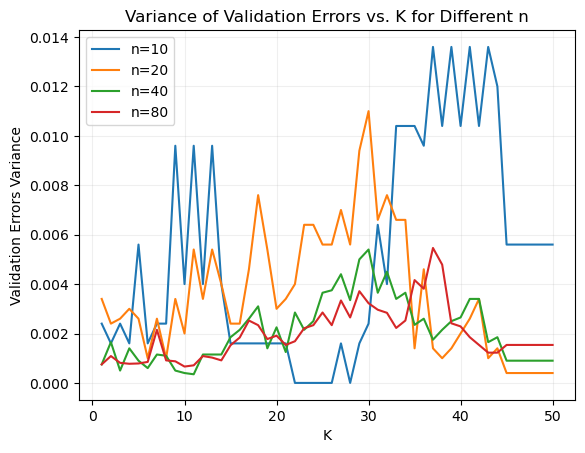

In [8]:
n_variance = []

for i, n in enumerate(lst_n):
    variances_for_n = []
    for k in range(1, m+1):
        error_count = []
        for j in range(5):
            error_count.append(total[i][j][k-1])
        variance_for_k = np.var(error_count)
        variances_for_n.append(variance_for_k)
    n_variance.append(variances_for_n)

# Plot the variance of validation errors for different n values as a function of K
for i, n in enumerate(lst_n):
    plt.plot(range(1, m + 1), n_variance[i], label=f"n={n}")

plt.xlabel("K")
plt.ylabel("Validation Errors Variance")
plt.title("Variance of Validation Errors vs. K for Different n")
plt.grid(alpha=0.2)
plt.legend()
plt.show()


# Task 2


In [15]:
print(SumList_list)

[[0.075, 0.0625, 0.0875, 0.05, 0.075, 0.05, 0.075, 0.05, 0.125, 0.1125, 0.125, 0.125, 0.125, 0.1125, 0.1125, 0.1125, 0.125, 0.1375, 0.175, 0.15, 0.15, 0.1375, 0.1625, 0.1625, 0.175, 0.175, 0.1875, 0.175, 0.2375, 0.225, 0.3, 0.2625, 0.3, 0.3, 0.3875, 0.375, 0.4125, 0.4, 0.4125, 0.4, 0.425, 0.3875, 0.45, 0.4375, 0.5125, 0.5125, 0.5125, 0.5125, 0.5125, 0.5125], [0.125, 0.125, 0.125, 0.125, 0.1125, 0.1, 0.125, 0.1, 0.125, 0.125, 0.125, 0.1625, 0.15, 0.175, 0.1875, 0.1875, 0.2, 0.2, 0.225, 0.225, 0.2125, 0.2375, 0.2375, 0.25, 0.275, 0.25, 0.3, 0.275, 0.35, 0.325, 0.3875, 0.35, 0.3875, 0.3875, 0.4375, 0.4125, 0.4375, 0.4375, 0.4375, 0.4375, 0.45, 0.4375, 0.475, 0.45, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], [0.05, 0.025, 0.0625, 0.05, 0.025, 0.025, 0.025, 0.0375, 0.0625, 0.05, 0.0625, 0.0625, 0.0875, 0.0875, 0.0875, 0.0625, 0.1, 0.075, 0.1375, 0.1125, 0.15, 0.1375, 0.15, 0.15, 0.2, 0.1625, 0.2, 0.2, 0.225, 0.2125, 0.3125, 0.3, 0.35, 0.3375, 0.3875, 0.3625, 0.425, 0.375, 0.425, 0.4125, 0.425, 0.425, 0.

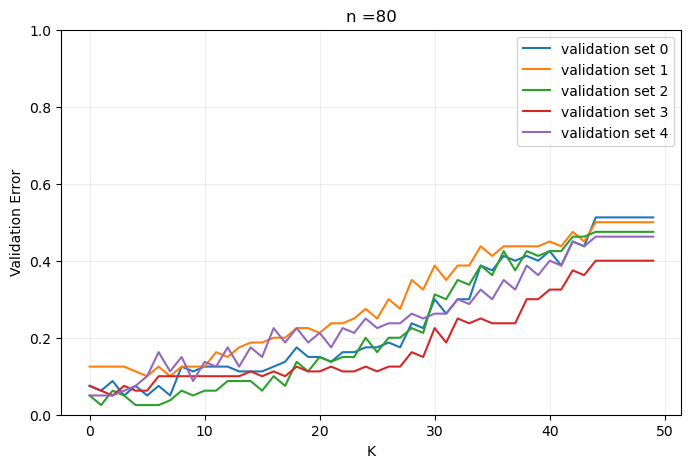

In [19]:

m = 50
n = 80

total = []

SumList_list = []
for i in range(5):
    val_x = validation_set_split(data_matrix, i, m, n)
    val_y = validation_set_split(labels, i, m, n)
    SumList = np.zeros(m)
    for a in range(len(val_x)):
        test = knn(x_train, y_train, val_x[a], val_y[a])
        #print(test)
        SumList = (SumList + test)
    SumList = list(map(lambda x: x / n, SumList))
    SumList_list.append(SumList)
total.append(SumList_list)


# Dummy data, x and y
x = np.arange(50)
y = SumList
#np.sin(x) + np.random.normal(0, 0.2, len(x))
# Initialise figure (fig) and axis (ax)
fig, ax = plt.subplots(figsize=(8,5))
# Plot in axis, add label to data
for i in range(len(SumList_list)):
    ax.plot(x, SumList_list[i], label=f'validation set {i}')
    
# Set labels and title
ax.set_xlabel('K')
ax.set_ylabel('Validation Error')
ax.set_title(f'n ={n}')
# Add grid
ax.grid(alpha=0.2)
# Set axes limit
#s
ax.set_ylim(0,1)
# Add legend (remember to label the data as shown above (*))
ax.legend()
# Show plot
plt.show()
# Save plot to some local path
fig.savefig('validation_err.png')







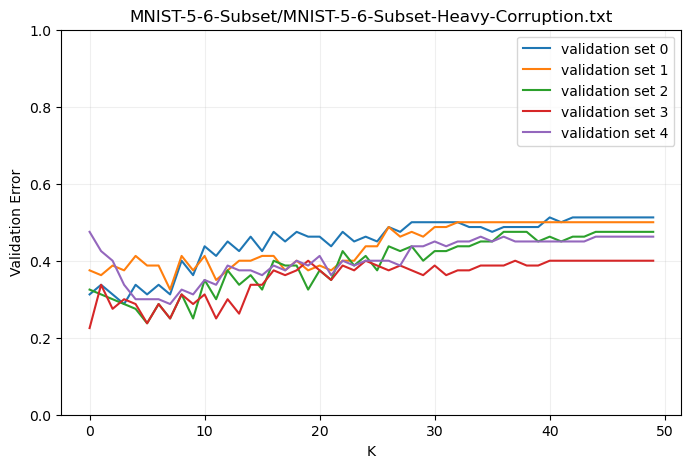

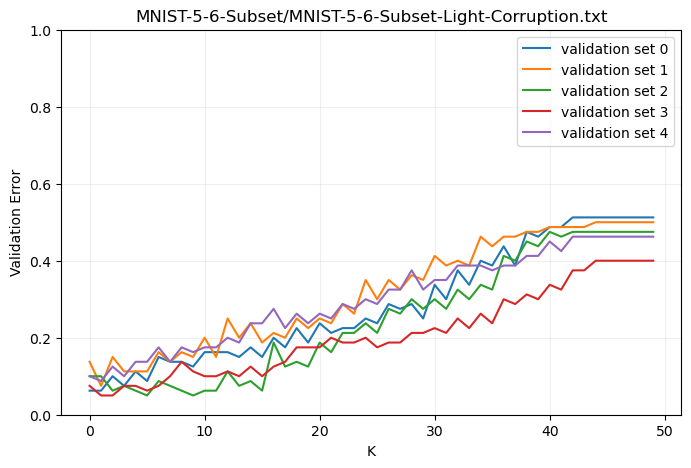

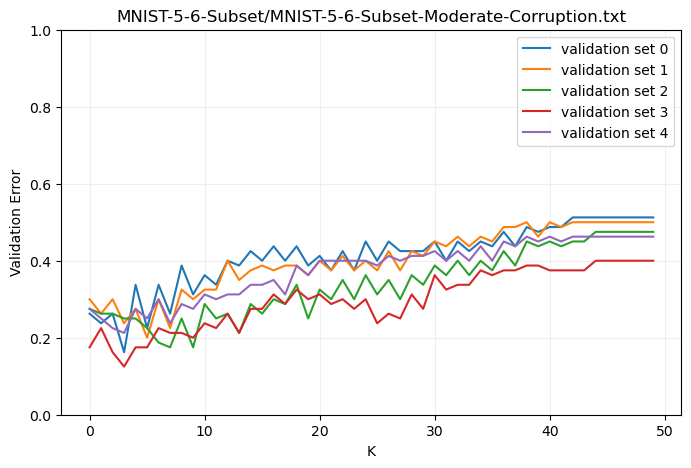

In [36]:
def AllInOne(data, m, n):



    data_file_path = data
    data_matrix = np.loadtxt(data_file_path).reshape(1877, 784)

    labels_file_path = "MNIST-5-6-Subset/MNIST-5-6-Subset-Labels.txt"
    labels = np.loadtxt(labels_file_path)

    # Split the data into training and testing sets
    x_train, y_train = data_matrix[:50], labels[:50]
    x_test, y_test = data_matrix[100], labels[100]

    lst_n = [n]

    total = []
    for n in lst_n:
        SumList_list = []
        for i in range(5):
            val_x = validation_set_split(data_matrix, i, m, n)
            val_y = validation_set_split(labels, i, m, n)
            SumList = np.zeros(m)
            for a in range(len(val_x)):
                test = knn(x_train, y_train, val_x[a], val_y[a])
                #print(test)
                SumList = (SumList + test)
            SumList = list(map(lambda x: x / n, SumList))
            SumList_list.append(SumList)
        total.append(SumList_list)
        

        # Dummy data, x and y
        x = np.arange(50)
        y = SumList
        #np.sin(x) + np.random.normal(0, 0.2, len(x))
        # Initialise figure (fig) and axis (ax)
        fig, ax = plt.subplots(figsize=(8,5))
        # Plot in axis, add label to data
        for i in range(len(SumList_list)):
            ax.plot(x, SumList_list[i], label=f'validation set {i}')
            
        # Set labels and title
        ax.set_xlabel('K')
        ax.set_ylabel('Validation Error')
        ax.set_title(f'n ={n}')
        # Add grid
        ax.grid(alpha=0.2)
        # Set axes limit
        #s
        ax.set_ylim(0,1)
        # Add legend (remember to label the data as shown above (*))
        ax.legend()
        # Show plot
        plt.title("{}".format(data))
        plt.title("{}".format(data))
        plt.show()
        # Save plot to some local path
        fig.savefig('validation_err.png')

data_lst = ["MNIST-5-6-Subset/MNIST-5-6-Subset-Heavy-Corruption.txt", "MNIST-5-6-Subset/MNIST-5-6-Subset-Light-Corruption.txt", "MNIST-5-6-Subset/MNIST-5-6-Subset-Moderate-Corruption.txt"]

for i in (data_lst):
    AllInOne(i, 50, 80)


